In [26]:
import pandas as pd
from skeLCS import eLCS
import matplotlib.pyplot as plot
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

#Read from CSV file
data = pd.read_csv("nba_logreg.csv")

#Specify the dataset's phenotype label
classLabel = "TARGET_5Yrs"

#Derive the attribute and phenotype array using the phenotype label
dataFeatures = data.drop(classLabel,axis = 1).values
dataPhenotypes = data[classLabel].values

#Optional: Retrieve the headers for each attribute as a length n array
dataHeaders = data.drop(classLabel,axis=1).columns.values

x_train, x_test, y_train, y_test = train_test_split(
         dataFeatures, dataPhenotypes, random_state=0)


In [27]:
model = eLCS(learning_iterations = 50000,track_accuracy_while_fit=True)
trainedModel = model.fit(x_train,y_train)


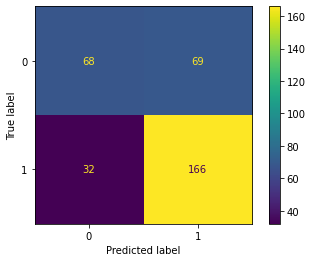

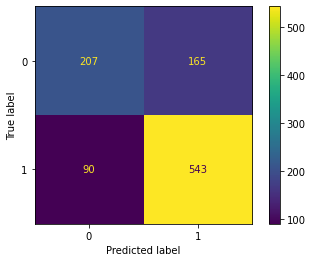

In [28]:
plot_confusion_matrix(model, x_test, y_test)  
plot.show()

plot_confusion_matrix(model, x_train, y_train)  
plot.show()


In [35]:
print("Final Training Accuracy: "+str(trainedModel.score(x_train,y_train)))
print("Final Test Accuracy: "+str(trainedModel.score(x_test,y_test)))


Final Training Accuracy: 0.7071357590582479
Final Test Accuracy: 0.667367101673671


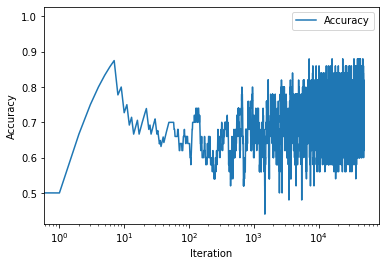

In [34]:
trainedModel.export_iteration_tracking_data("iterationData.csv")
dataTracking = pd.read_csv("iterationData.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values

plot.xscale('log',base=10) 

plot.plot(iterations,accuracy,label="Accuracy")
plot.xlabel('Iteration')
plot.ylabel('Accuracy')
plot.legend()
plot.show()


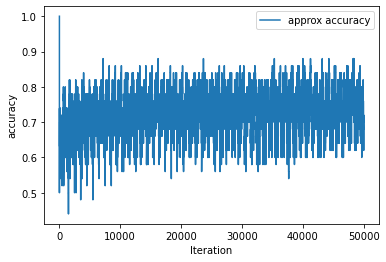

In [33]:
trainedModel.export_iteration_tracking_data("iterationData.csv")
dataTracking = pd.read_csv("iterationData.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values

# plot.xscale('log',base=10) 

plot.plot(iterations,accuracy,label="approx accuracy")
plot.xlabel('Iteration')
plot.ylabel('accuracy')
plot.legend()
plot.show()


In [32]:
trainedModel.export_final_rule_population(dataHeaders,classLabel,filename="fileRulePopulation.csv",DCAL=False)

populationData2 = pd.read_csv("fileRulePopulation.csv")
display(populationData2)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,"5.025,36.975","-1.2069999999999999,9.407","-5.500000000000001,9.900000000000002",#,"-0.45500000000000007,5.055",#,#,#,#,"-1.2555,2.0555",...,0.100000,1.000000,1,2.500000,53,53,0.526316,0.000028,0,0
1,"-5.487614822941606,59.005","-2.9350000000000014,17.754","-2.9250000000000007,14.125",#,#,"26.271999999999995,55.528000000000006",#,"-1.7225000000000001,1.7225000000000001",#,#,...,0.385543,0.826446,1,84.657049,49998,35673,0.473684,0.000944,200,242
2,#,"6.036999999999999,28.363",#,#,"-3.0400000000000005,6.84","43.455999999999996,53.408",#,"-1.56,1.56",#,#,...,0.469176,0.859542,1,89.473798,49929,36807,0.473684,0.000998,563,655
3,#,#,#,#,#,#,#,#,#,"3.8375,5.7625",...,1.000000,1.000000,1,23.463183,49877,36812,0.368421,0.000262,13,13
4,"-5.235000000000003,60.65","6.375,33.825",#,#,#,#,#,#,#,#,...,1.000000,1.000000,4,74.838997,49951,37031,0.315789,0.003338,207,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,"22.69571616877449,104.98582558533758",#,#,#,#,#,"1.6515000000000002,2.4210000000000003",#,"-35.5,51.0","-0.10999999999999988,3.1015",...,0.100000,1.000000,1,67.291347,49994,49994,0.315789,0.000750,0,0
934,#,"7.609999999999999,19.79322071098244",#,#,#,#,"0.5630000000000001,0.8995884681711678","-2.2399999999999998,4.047499999999999","10.600000000000001,55.60000000000001",#,...,0.067577,0.905660,1,49.000000,49995,49995,0.368421,0.000546,0,0
935,"58.055,99.945",#,#,#,"1.862137289271928,20.13",#,"-0.828,1.4759352236535355",#,"0.5999999999999979,56.6",#,...,0.067577,0.905660,1,62.177048,49995,49995,0.315789,0.000693,0,0
936,"-5.487614822941606,59.005","-2.9350000000000014,7.729834595320657","-2.9250000000000007,14.125",#,#,"45.096,55.528000000000006",#,"-1.7225000000000001,1.7225000000000001",#,"-1.0475,1.6475000000000002",...,0.100000,1.000000,1,64.176152,49998,49998,0.526316,0.000716,0,0
